# Word Distributions and Word Cloud

In [23]:
import pickle
import pandas as pd 
import matplotlib.pyplot as plt
import os
import nltk
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.probability import FreqDist
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ibubalo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ibubalo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ibubalo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [2]:
df = pd.read_pickle(r"C:\Users\ibubalo\Documents\WAI_GitHub\WaiLearn-September-NLP\df_captions_preprocessed1.pkl")

In [3]:
df.head()

,image_name,comment_number,comment,tokenized_captions,cleaned_image_name,lstm_input
0,1000092795.jpg,0,Two young guys with shaggy hair look at their...,"[two, young, guys, with, shaggy, hair, look, a...",1000092795,"[startseq, two, young, guys, with, shaggy, hai..."
1,1000092795.jpg,1,"Two young , White males are outside near many...","[two, young, white, males, are, outside, near,...",1000092795,"[startseq, two, young, white, males, are, outs..."
2,1000092795.jpg,2,Two men in green shirts are standing in a yard .,"[two, men, in, green, shirts, are, standing, i...",1000092795,"[startseq, two, men, in, green, shirts, are, s..."
3,1000092795.jpg,3,A man in a blue shirt standing in a garden .,"[man, in, blue, shirt, standing, in, garden]",1000092795,"[startseq, man, in, blue, shirt, standing, in,..."
4,1000092795.jpg,4,Two friends enjoy time spent together .,"[two, friends, enjoy, time, spent, together]",1000092795,"[startseq, two, friends, enjoy, time, spent, t..."


In [6]:
words = word_tokenize(str(df['tokenized_captions']))
print(words)
print("\n")
print(len(words))

['0', '[', 'two', ',', 'young', ',', 'guys', ',', 'with', ',', 'shaggy', ',', 'hair', ',', 'look', ',', 'a', '...', '1', '[', 'two', ',', 'young', ',', 'white', ',', 'males', ',', 'are', ',', 'outside', ',', 'near', ',', '...', '2', '[', 'two', ',', 'men', ',', 'in', ',', 'green', ',', 'shirts', ',', 'are', ',', 'standing', ',', 'i', '...', '3', '[', 'man', ',', 'in', ',', 'blue', ',', 'shirt', ',', 'standing', ',', 'in', ',', 'garden', ']', '4', '[', 'two', ',', 'friends', ',', 'enjoy', ',', 'time', ',', 'spent', ',', 'together', ']', '...', '158910', '[', 'man', ',', 'in', ',', 'shorts', ',', 'and', ',', 'hawaiian', ',', 'shirt', ',', 'leans', ',', '...', '158911', '[', 'young', ',', 'man', ',', 'hanging', ',', 'over', ',', 'the', ',', 'side', ',', 'of', ',', 'boa', '...', '158912', '[', 'man', ',', 'is', ',', 'leaning', ',', 'off', ',', 'of', ',', 'the', ',', 'side', ',', 'of', ',', 'blu', '...', '158913', '[', 'man', ',', 'riding', ',', 'small', ',', 'boat', ',', 'in', ',', 'harbor

In [7]:
#Frequency distribution and 200 most common words
fdist = FreqDist(words)
fdist.most_common(200)

[(',', 70),
 ('[', 10),
 ('...', 9),
 ('man', 6),
 ('in', 5),
 ('two', 4),
 ('young', 3),
 ('with', 3),
 ('of', 3),
 (':', 3),
 ('white', 2),
 ('are', 2),
 ('standing', 2),
 ('blue', 2),
 ('shirt', 2),
 (']', 2),
 ('and', 2),
 ('the', 2),
 ('side', 2),
 ('boat', 2),
 ('0', 1),
 ('guys', 1),
 ('shaggy', 1),
 ('hair', 1),
 ('look', 1),
 ('a', 1),
 ('1', 1),
 ('males', 1),
 ('outside', 1),
 ('near', 1),
 ('2', 1),
 ('men', 1),
 ('green', 1),
 ('shirts', 1),
 ('i', 1),
 ('3', 1),
 ('garden', 1),
 ('4', 1),
 ('friends', 1),
 ('enjoy', 1),
 ('time', 1),
 ('spent', 1),
 ('together', 1),
 ('158910', 1),
 ('shorts', 1),
 ('hawaiian', 1),
 ('leans', 1),
 ('158911', 1),
 ('hanging', 1),
 ('over', 1),
 ('boa', 1),
 ('158912', 1),
 ('is', 1),
 ('leaning', 1),
 ('off', 1),
 ('blu', 1),
 ('158913', 1),
 ('riding', 1),
 ('small', 1),
 ('harbor', 1),
 ('f', 1),
 ('158914', 1),
 ('on', 1),
 ('moored', 1),
 ('Name', 1),
 ('tokenized_captions', 1),
 ('Length', 1),
 ('158915', 1),
 ('dtype', 1),
 ('object'

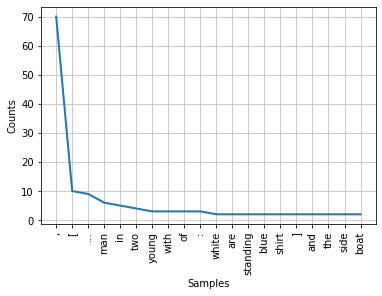

In [8]:
#plot frequency distribution
fdist.plot(20)

In [9]:
#removing punctuation plot
words_no_punct = []
for w in words:
  if w.isalpha():
    words_no_punct.append(w.lower())
print(words_no_punct)

['two', 'young', 'guys', 'with', 'shaggy', 'hair', 'look', 'a', 'two', 'young', 'white', 'males', 'are', 'outside', 'near', 'two', 'men', 'in', 'green', 'shirts', 'are', 'standing', 'i', 'man', 'in', 'blue', 'shirt', 'standing', 'in', 'garden', 'two', 'friends', 'enjoy', 'time', 'spent', 'together', 'man', 'in', 'shorts', 'and', 'hawaiian', 'shirt', 'leans', 'young', 'man', 'hanging', 'over', 'the', 'side', 'of', 'boa', 'man', 'is', 'leaning', 'off', 'of', 'the', 'side', 'of', 'blu', 'man', 'riding', 'small', 'boat', 'in', 'harbor', 'with', 'f', 'man', 'on', 'moored', 'blue', 'and', 'white', 'boat', 'with', 'name', 'length', 'dtype', 'object']


In [10]:
fdist = FreqDist(words_no_punct)
fdist.most_common(100)

[('man', 6),
 ('in', 5),
 ('two', 4),
 ('young', 3),
 ('with', 3),
 ('of', 3),
 ('white', 2),
 ('are', 2),
 ('standing', 2),
 ('blue', 2),
 ('shirt', 2),
 ('and', 2),
 ('the', 2),
 ('side', 2),
 ('boat', 2),
 ('guys', 1),
 ('shaggy', 1),
 ('hair', 1),
 ('look', 1),
 ('a', 1),
 ('males', 1),
 ('outside', 1),
 ('near', 1),
 ('men', 1),
 ('green', 1),
 ('shirts', 1),
 ('i', 1),
 ('garden', 1),
 ('friends', 1),
 ('enjoy', 1),
 ('time', 1),
 ('spent', 1),
 ('together', 1),
 ('shorts', 1),
 ('hawaiian', 1),
 ('leans', 1),
 ('hanging', 1),
 ('over', 1),
 ('boa', 1),
 ('is', 1),
 ('leaning', 1),
 ('off', 1),
 ('blu', 1),
 ('riding', 1),
 ('small', 1),
 ('harbor', 1),
 ('f', 1),
 ('on', 1),
 ('moored', 1),
 ('name', 1),
 ('length', 1),
 ('dtype', 1),
 ('object', 1)]

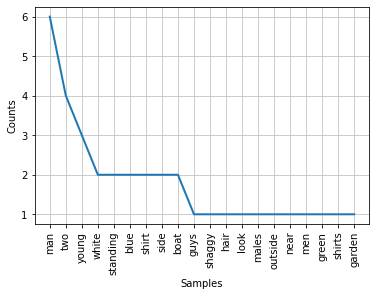

In [29]:
#plot frequency distribution
fdist.plot(20)

In [11]:
#find stopwords
from nltk.corpus import stopwords
stopwords = stopwords.words("english")
#print(stopwords)

In [12]:
#removing stopwords
words_no_sw = []
for w in words_no_punct:
  if w not in stopwords:
    words_no_sw.append(w.lower())

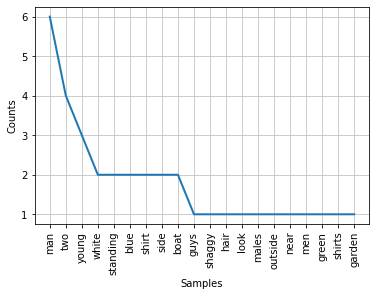

In [13]:
#final frequency
fdist = FreqDist(words_no_sw)
fdist.plot(20)

# Word Cloud 

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

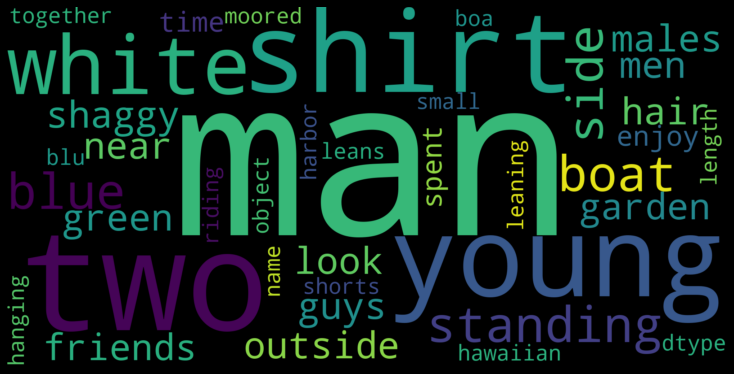

In [30]:
wordcloud = WordCloud(
    width = 2000,
    height = 1000,
    background_color = 'black').generate(" ".join(words_no_sw))
#Dsplaying words
fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()